In [223]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [4]:
listings_1_19 = pd.read_csv("data/listings/listings_1_19.csv")

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [226]:
listings_2_19 = pd.read_csv("data/listings/listings_2_19.csv")

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [254]:
listings_2_19.to_csv("data/listings/listings_output.csv")

# Cleaning Data

In [230]:
columns_2_19 = list(listings_2_19.columns)
columns_2_19

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [232]:
 # (43,61,62,94,95) have mixed types
columns_2_19[43], columns_2_19[61], columns_2_19[62], columns_2_19[94], columns_2_19[95]
# which kinds of columns have mixed types? zipcode, weekly price,  monthly price, 
# license??? jurisdiction names??

    

('zipcode', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names')

In [213]:
# data types for all of the columns
data_types = listings_2_19.dtypes
list(zip(columns_2_19, data_types))

[('id', dtype('int64')),
 ('listing_url', dtype('O')),
 ('scrape_id', dtype('int64')),
 ('last_scraped', dtype('O')),
 ('name', dtype('O')),
 ('summary', dtype('O')),
 ('space', dtype('O')),
 ('description', dtype('O')),
 ('experiences_offered', dtype('O')),
 ('neighborhood_overview', dtype('O')),
 ('notes', dtype('O')),
 ('transit', dtype('O')),
 ('access', dtype('O')),
 ('interaction', dtype('O')),
 ('house_rules', dtype('O')),
 ('thumbnail_url', dtype('float64')),
 ('medium_url', dtype('float64')),
 ('picture_url', dtype('O')),
 ('xl_picture_url', dtype('float64')),
 ('host_id', dtype('int64')),
 ('host_url', dtype('O')),
 ('host_name', dtype('O')),
 ('host_since', dtype('O')),
 ('host_location', dtype('O')),
 ('host_about', dtype('O')),
 ('host_response_time', dtype('O')),
 ('host_response_rate', dtype('O')),
 ('host_acceptance_rate', dtype('float64')),
 ('host_is_superhost', dtype('O')),
 ('host_thumbnail_url', dtype('O')),
 ('host_picture_url', dtype('O')),
 ('host_neighbourhood'

In [220]:
data_types

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [415]:
listings_2_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 40.6+ MB


In [421]:
# this mighjt not be accurate becaue can it tell if a stirng "Nan" is nan ? 
listings_2_19.count()/len(listings_2_19)

id                                              1.000000
listing_url                                     1.000000
scrape_id                                       1.000000
last_scraped                                    1.000000
name                                            0.999681
summary                                         0.959704
space                                           0.701919
description                                     0.986521
experiences_offered                             1.000000
neighborhood_overview                           0.618161
notes                                           0.411026
transit                                         0.638707
access                                          0.577088
interaction                                     0.573963
house_rules                                     0.601079
thumbnail_url                                   0.000000
medium_url                                      0.000000
picture_url                    

In [422]:
listings_2_19.count()

id                                              50228
listing_url                                     50228
scrape_id                                       50228
last_scraped                                    50228
name                                            50212
summary                                         48204
space                                           35256
description                                     49551
experiences_offered                             50228
neighborhood_overview                           31049
notes                                           20645
transit                                         32081
access                                          28986
interaction                                     28829
house_rules                                     30191
thumbnail_url                                       0
medium_url                                          0
picture_url                                     50228
xl_picture_url              

In [394]:
listings_2_19_clean = listings_2_19[['id',
 'name',
 'host_id',
 'host_response_time',
 'host_response_rate',

 'host_is_superhost',

 'host_total_listings_count',
 'host_verifications',

 'host_identity_verified',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'instant_bookable',
 'cancellation_policy',
 'reviews_per_month']].copy()

In [8]:
listings_2_19.columns #35 columns instead of 106

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

### Cleaning zipcodes

In [110]:
# see which values are not integers 

listings_2_19[['zipcode']][listings_2_19['zipcode'].str.isdigit() == False]


,zipcode
4458,11249\n11249
9984,11103-3233
11019,10002-2289
20530,11385-2308
29833,11413-3220
33942,-- default zip code --
36054,11692-2304


In [10]:
# cleaning zipcode helper function
def clean_zipcode(zipcode):
    if zipcode.isdigit():
        return zipcode
    elif zipcode[:5].isdigit():
        return zipcode[:5]
    else:
        return np.nan
clean_zipcode('11285\n123')

'11285'

In [249]:
listings_2_19['zipcode'] = listings_2_19['zipcode'].astype(str).apply(lambda zipcode: clean_zipcode(zipcode))

In [234]:
listings_2_19['zipcode']

0        10022
1        11218
2        10018
3        11206
4        10027
5        11238
6        10029
7        10016
8        11216
9        10019
10       10025
11       10010
12       10002
13       10025
14       10036
15       10065
16       11215
17       10025
18       10014
19       11211
20       10029
21       11218
22       11205
23       10011
24       11216
25       11211
26       10010
27       11217
28       11217
29       10009
         ...  
50198    10075
50199    10013
50200    11225
50201    11221
50202    11691
50203    11691
50204    11416
50205    11203
50206    10003
50207    11221
50208    10036
50209    11234
50210    11209
50211    10011
50212    11216
50213    10003
50214    10019
50215    10013
50216    11365
50217    11226
50218    11249
50219    10033
50220    10031
50221    10014
50222    11221
50223    10022
50224    10001
50225    11249
50226    10022
50227    10016
Name: zipcode, Length: 50228, dtype: object

In [166]:
listings_2_19[['zipcode']][listings_2_19['zipcode'].str.isdigit() == False]

,zipcode
4458,11249\n11249
9984,11103-3233
11019,10002-2289
20530,11385-2308
29833,11413-3220
33942,-- default zip code --
36054,11692-2304


In [98]:
'112\n16'.isdigit()

False

In [78]:
#listings_2_19['zipcode'].where(listings_2_19['zipcode'].str.contains('\n',  regex = True, na = True))

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
50198    10075
50199    10013
50200    11225
50201    11221
50202    11691
50203    11691
50204    11416
50205    11203
50206    10003
50207    11221
50208    10036
50209    11234
50210    11209
50211    10011
50212    11216
50213    10003
50214    10019
50215    10013
50216    11365
50217    11226
50218    11249
50219    10033
50220    10031
50221    10014
50222    11221
50223    10022
50224    10001
50225    11249
50226    10022
50227    10016
Name: zipcode, Length: 50228, dtype: object

In [250]:
listings_2_19["zipcode"] = listings_2_19["zipcode"].astype(str)

In [236]:
listings_2_19["zipcode"]

0        10022
1        11218
2        10018
3        11206
4        10027
5        11238
6        10029
7        10016
8        11216
9        10019
10       10025
11       10010
12       10002
13       10025
14       10036
15       10065
16       11215
17       10025
18       10014
19       11211
20       10029
21       11218
22       11205
23       10011
24       11216
25       11211
26       10010
27       11217
28       11217
29       10009
         ...  
50198    10075
50199    10013
50200    11225
50201    11221
50202    11691
50203    11691
50204    11416
50205    11203
50206    10003
50207    11221
50208    10036
50209    11234
50210    11209
50211    10011
50212    11216
50213    10003
50214    10019
50215    10013
50216    11365
50217    11226
50218    11249
50219    10033
50220    10031
50221    10014
50222    11221
50223    10022
50224    10001
50225    11249
50226    10022
50227    10016
Name: zipcode, Length: 50228, dtype: object

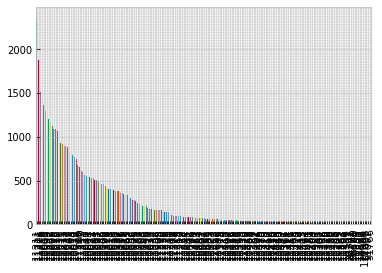

In [15]:
#listings_2_19_clean['zipcode'].(figsize=(16, 20), xlabelsize=8, ylabelsize=8);
listings_2_19['zipcode'].value_counts().plot(kind='bar')

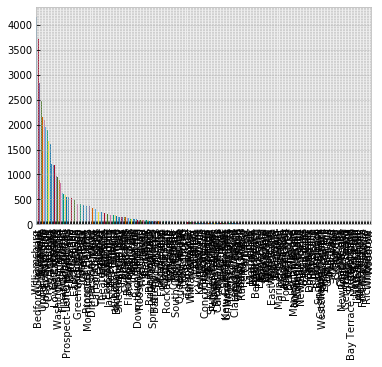

In [16]:
listings_2_19["neighbourhood_cleansed"].value_counts().plot(kind = 'bar')

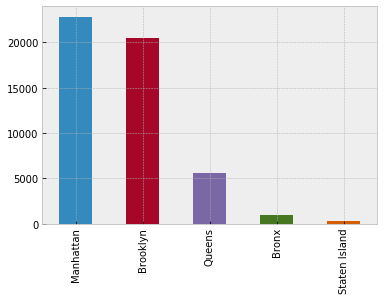

In [17]:
listings_2_19["neighbourhood_group_cleansed"].value_counts().plot(kind = "bar")

In [101]:
neighborhood_dummies = get_dummy_variables("neighbourhood_group_cleansed")

In [18]:
listings_2_19["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [237]:
room_type_series = listings_2_19["room_type"]
room_type_series
cat_room_type = room_type_series.astype('category')
#cat_room_type.cat.codes
pd.get_dummies(cat_room_type)

,Entire home/apt,Private room,Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,0,1,0
9,0,1,0


In [19]:
def get_dummy_variables(column):
    categories = listings_2_19[column].astype('category')
    return pd.get_dummies(categories, prefix=column)

In [238]:
room_type_dummies = get_dummy_variables("room_type")

In [239]:
zip_code_dummies = get_dummy_variables("zipcode")

In [240]:
dummies = pd.concat([room_type_dummies, zip_code_dummies], axis = 1)

In [241]:
dummies = pd.concat([dummies, listings_2_19['price']], axis = 1)

In [242]:
dummies = pd.concat([dummies, neighborhood_dummies], axis = 1)

In [68]:
dummies.price.dtype

dtype('float64')

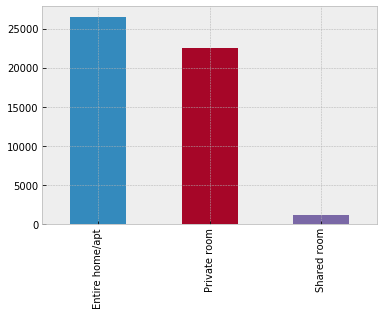

In [55]:
listings_2_19["room_type"].value_counts().plot(kind = "bar")

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [57]:
listings_2_19["property_type"].unique()

array(['Condominium', 'Apartment', 'Guest suite', 'Townhouse', 'Loft',
       'Bed and breakfast', 'House', 'Boutique hotel', 'Treehouse',
       'Guesthouse', 'Serviced apartment', 'Other', 'Resort', 'Boat',
       'Hostel', 'Hotel', 'Aparthotel', 'Earth house', 'Bungalow',
       'Cottage', 'Villa', 'Cave', 'Houseboat', 'Cabin', 'Castle',
       'Tiny house', 'Nature lodge', 'Tent', 'Timeshare', 'Camper/RV',
       'Casa particular (Cuba)', 'Bus', 'Farm stay', 'Minsu (Taiwan)'],
      dtype=object)

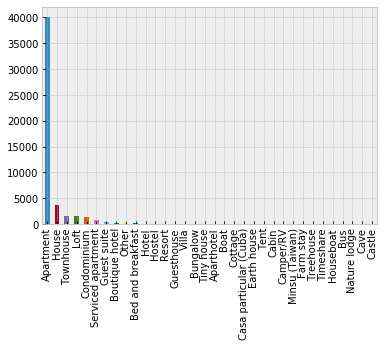

In [453]:
listings_2_19["property_type"].value_counts().plot(kind = "bar")

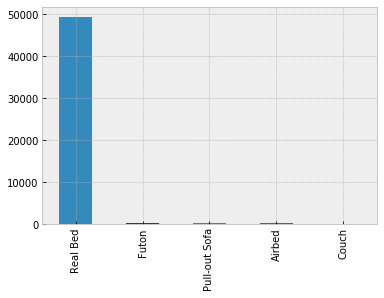

In [56]:
listings_2_19["bed_type"].value_counts().plot(kind = "bar")

In [58]:
listings_2_19["host_is_superhost"].value_counts().plot(kind = "bar"b)

SyntaxError: invalid syntax (<ipython-input-58-8503b9d1ea62>, line 1)

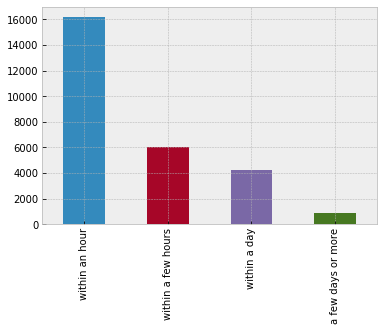

In [457]:
listings_2_19_clean["host_response_time"].value_counts().plot(kind = "bar")

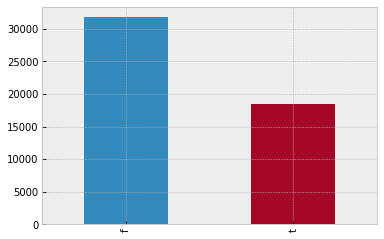

In [458]:
listings_2_19_clean["instant_bookable"].value_counts().plot(kind = "bar")

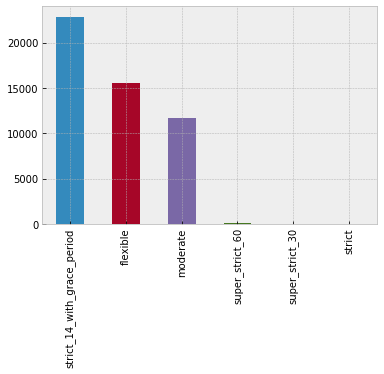

In [459]:
listings_2_19_clean["cancellation_policy"].value_counts().plot(kind = "bar")

# Continuous Variables

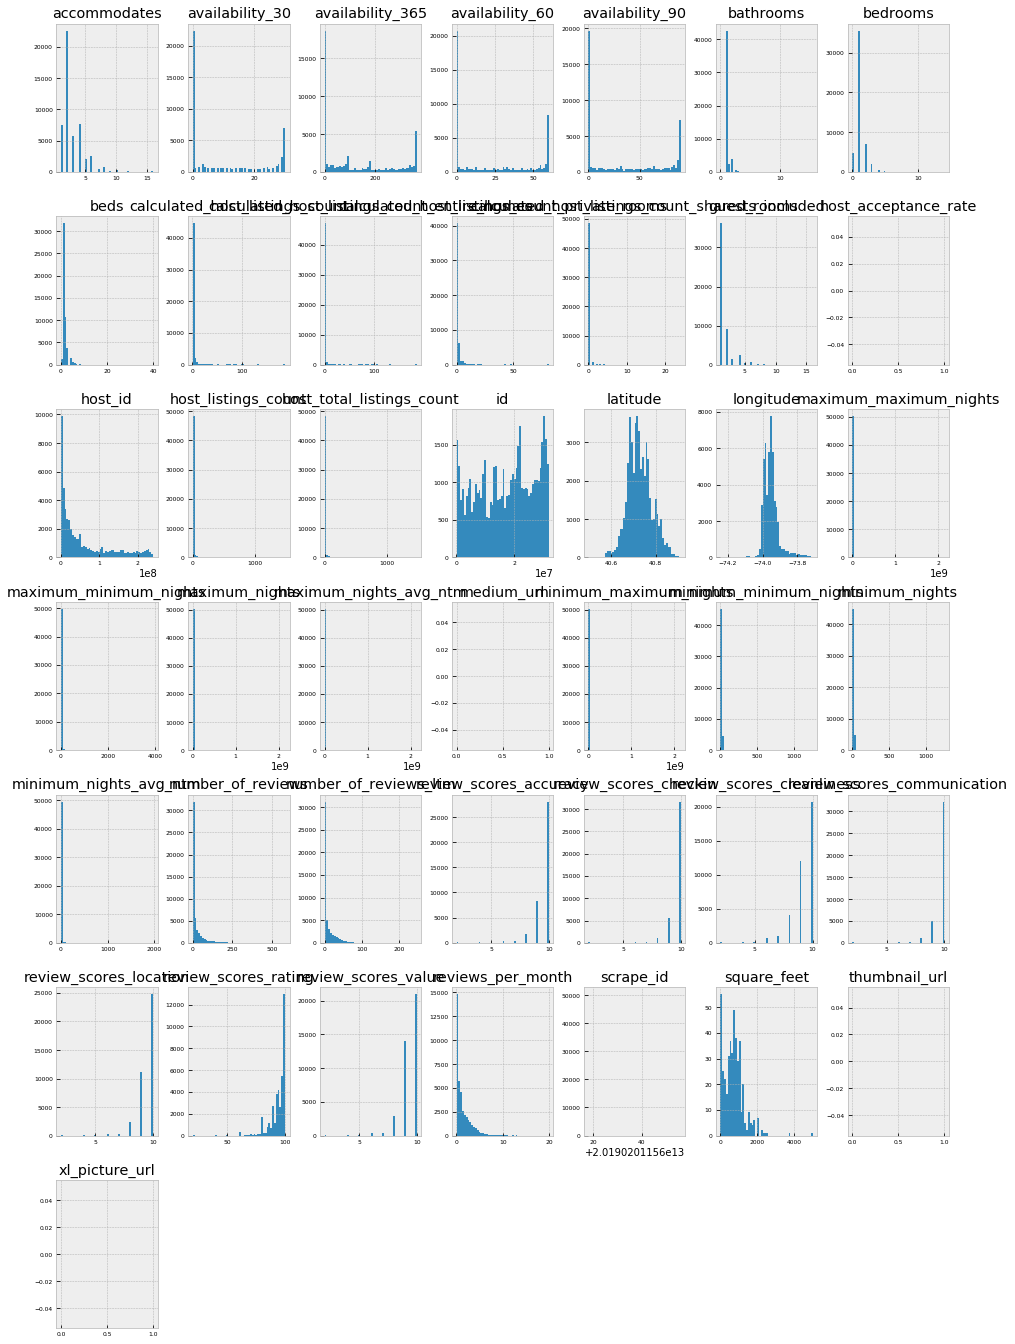

In [480]:
listings_num = listings_2_19.select_dtypes(include = ['float64', 'int64'])
listings_num.hist(figsize=(16, 24), bins=50, xlabelsize=6, ylabelsize=6);

In [486]:
list(listings_num.columns)

['id',
 'scrape_id',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_id',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month'

### Weekly and monthly prices

In [251]:
# remove dollar signs and commas from weekly prices, then convert to floats
listings_num2 = pd.DataFrame()
listings_num2['weekly_price'] = listings_2_19["weekly_price"].str.replace('$','')

listings_num2['weekly_price'] = listings_num2['weekly_price'].str.replace(',', '')
listings_num2['weekly_price'] = listings_num2['weekly_price'].astype(float)

In [518]:
listings_num2

,weekly_price
0,NaN
1,299.0
2,1995.0
3,650.0
4,NaN
5,575.0
6,600.0
7,NaN
8,NaN
9,470.0


In [519]:
listings_num2['weekly_price']

0           NaN
1         299.0
2        1995.0
3         650.0
4           NaN
5         575.0
6         600.0
7           NaN
8           NaN
9         470.0
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21        440.0
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27        900.0
28        850.0
29       2200.0
          ...  
50198       NaN
50199       NaN
50200       NaN
50201       NaN
50202       NaN
50203       NaN
50204       NaN
50205       NaN
50206       NaN
50207       NaN
50208       NaN
50209       NaN
50210       NaN
50211       NaN
50212       NaN
50213       NaN
50214       NaN
50215       NaN
50216       NaN
50217       NaN
50218       NaN
50219       NaN
50220       NaN
50221       NaN
50222       NaN
50223       NaN
50224       NaN
50225       NaN
50226       NaN
50227       NaN
Name: weekly_price, Leng

In [245]:
# remove dollar signs and commas from motnhly prices, then convert to floats
listings_num2['monthly_price'] = listings_2_19["monthly_price"].str.replace('$','')
listings_num2["monthly_price"] = listings_num2['monthly_price'].str.replace(',', '')
listings_num2['monthly_price'] = listings_num2['monthly_price'].astype(float)

In [521]:
listings_num2['monthly_price'].count()

5793

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1683a6ba8>,
      dtype=object)

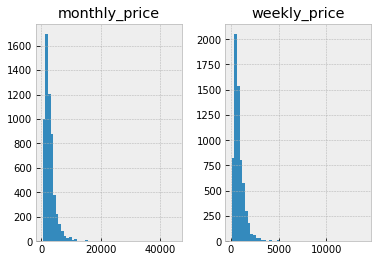

In [522]:
listings_num2.hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1caf5ac8>,
      dtype=object)

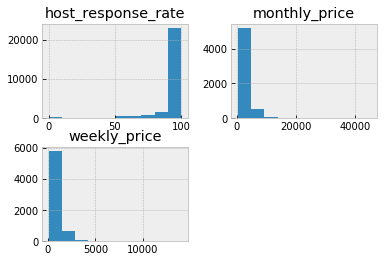

In [246]:
# host response rate
listings_num2["host_response_rate"] = listings_2_19.host_response_rate.str.replace("%","").astype(float)
listings_num2.hist()

In [527]:
listings_num2["host_listings_count"] = listings_2_19.host_listings_count.astype(float)

In [247]:
listings_num2["price"] = listings_2_19.price.str.replace("$","")
listings_num2.price = listings_num2.price.str.replace(",", "").astype(float)
listings_num2.price.describe()

count    50228.000000
mean       150.484889
std        225.907959
min          0.000000
25%         69.000000
50%        108.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [569]:
listings_num3 = pd.merge(listings_num, listings_num2)


KeyboardInterrupt: 

In [570]:
listings_num2

,weekly_price,monthly_price,host_response_rate,host_listings_count,price
0,NaN,NaN,60.0,1.0,137.0
1,299.0,999.0,100.0,8.0,149.0
2,1995.0,NaN,60.0,5.0,225.0
3,650.0,1900.0,NaN,4.0,70.0
4,NaN,NaN,NaN,1.0,150.0
5,575.0,2100.0,96.0,1.0,89.0
6,600.0,1600.0,0.0,1.0,80.0
7,NaN,NaN,80.0,1.0,185.0
8,NaN,NaN,NaN,1.0,60.0
9,470.0,NaN,97.0,1.0,79.0


In [571]:
listings_num3 = listings_num.copy()

In [574]:
listings_num3[["weekly_price","monthly_price","host_response_rate","host_listings_count","price"]] = listings_num2.copy()

In [575]:
listings_num3

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,weekly_price,monthly_price,host_response_rate,price
0,2454,20190201155637,NaN,NaN,NaN,2688,NaN,1.0,1.0,40.755523,...,NaN,1,1,0,0,1.00,NaN,NaN,60.0,137.0
1,2539,20190201155637,NaN,NaN,NaN,2787,NaN,8.0,8.0,40.647486,...,10.0,8,0,5,3,0.23,299.0,999.0,100.0,149.0
2,2595,20190201155637,NaN,NaN,NaN,2845,NaN,5.0,5.0,40.753621,...,9.0,2,1,0,1,0.38,1995.0,NaN,60.0,225.0
3,3330,20190201155637,NaN,NaN,NaN,4177,NaN,4.0,4.0,40.708558,...,10.0,3,0,3,0,0.35,650.0,1900.0,NaN,70.0
4,3647,20190201155637,NaN,NaN,NaN,4632,NaN,1.0,1.0,40.809018,...,NaN,1,0,1,0,NaN,NaN,NaN,NaN,150.0
5,3831,20190201155637,NaN,NaN,NaN,4869,NaN,1.0,1.0,40.685138,...,10.0,1,1,0,0,4.37,575.0,2100.0,96.0,89.0
6,5022,20190201155637,NaN,NaN,NaN,7192,NaN,1.0,1.0,40.798514,...,10.0,1,1,0,0,0.11,600.0,1600.0,0.0,80.0
7,5099,20190201155637,NaN,NaN,NaN,7322,NaN,1.0,1.0,40.747672,...,9.0,1,1,0,0,0.59,NaN,NaN,80.0,185.0
8,5121,20190201155637,NaN,NaN,NaN,7356,NaN,1.0,1.0,40.686882,...,9.0,1,0,1,0,0.42,NaN,NaN,NaN,60.0
9,5178,20190201155637,NaN,NaN,NaN,8967,NaN,1.0,1.0,40.764887,...,9.0,1,0,1,0,3.46,470.0,NaN,97.0,79.0


### licesnse and  jurisdiction name

In [198]:
print(listings_2_19["license"].isna().sum())
len(listings_2_19)

# onlye 8 values are not NaN, so we can ignore this column 

50220


50228

In [201]:

len(listings_2_19["jurisdiction_names"]) - listings_2_19["jurisdiction_names"].isna().sum()
# only 10 are not NaN, so also ignor this column

10

In [6]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 40.6+ MB


## Experiences offered  - all none

In [219]:
listings_2_19["experiences_offered"][listings_2_19["experiences_offered"] != "none"]

Series([], Name: experiences_offered, dtype: object)

In [260]:
zipcode_count = listings_2_19_clean.groupby("zipcode").count()[["id"]]
zipcode_count

,id
zipcode,
07093,1
10001,540
10002,1290
10003,1124
10004,67
10005,221
10006,81
10007,59
10009,1212


In [229]:
listings_2_19_clean.groupby("neighbourhood_cleansed").count()[["id"]]

,id
neighbourhood_cleansed,
Allerton,38
Arden Heights,2
Arrochar,22
Arverne,69
Astoria,947
Bath Beach,14
Battery Park City,68
Bay Ridge,141
Bay Terrace,5


## population by zip code

In [269]:
zipcode_populations = pd.read_csv("data/newyork_zipcode_populations.csv")
zipcode_populations = zipcode_populations.rename(columns={'ZIP Code': "zipcode", 'Area Code(s)': 'area_codes'})
zipcode_populations.head()

,zipcode,Type,County,Population,area_codes
0,ZIP Code 10001,Standard,New York,"21,102",646 / 718 / 917
1,ZIP Code 10002,Standard,New York,"81,410",718
2,ZIP Code 10003,Standard,New York,"56,024",212 / 646 / 347 / 917 / 718
3,ZIP Code 10004,Standard,New York,"3,089",212 / 917 / 718 / 646 / 347
4,ZIP Code 10005,Standard,New York,"7,135",212 / 646 / 917 / 718 / 929 / 332 / 347


In [270]:
def clean_zip(zipcode_string):
    return zipcode_string[-5:]
clean_zip("ZIP Code 10001")

'10001'

In [272]:
#clean zip coddes
zipcode_populations["zipcode"] = zipcode_populations["zipcode"].apply(lambda zipcode: clean_zip(zipcode))
zipcode_populations.head()

,zipcode,Type,County,Population,area_codes
0,10001,Standard,New York,"21,102",646 / 718 / 917
1,10002,Standard,New York,"81,410",718
2,10003,Standard,New York,"56,024",212 / 646 / 347 / 917 / 718
3,10004,Standard,New York,"3,089",212 / 917 / 718 / 646 / 347
4,10005,Standard,New York,"7,135",212 / 646 / 917 / 718 / 929 / 332 / 347


In [273]:
# clean population value 
#zipcode_populations["Population"].replace("$", '')
zipcode_populations["Population"] = zipcode_populations["Population"].str.replace(",", "").astype(int)



In [274]:
zipcode_populations.head()

,zipcode,Type,County,Population,area_codes
0,10001,Standard,New York,21102,646 / 718 / 917
1,10002,Standard,New York,81410,718
2,10003,Standard,New York,56024,212 / 646 / 347 / 917 / 718
3,10004,Standard,New York,3089,212 / 917 / 718 / 646 / 347
4,10005,Standard,New York,7135,212 / 646 / 917 / 718 / 929 / 332 / 347


## air bnb density by zipcode

In [276]:
zipcode_count.reset_index()

,zipcode,id
0,07093,1
1,10001,540
2,10002,1290
3,10003,1124
4,10004,67
5,10005,221
6,10006,81
7,10007,59
8,10009,1212
9,10010,387


In [279]:
zipcode_density = pd.merge(zipcode_count, zipcode_populations[["zipcode","Population"]], on = 'zipcode')

In [280]:
zipcode_density["density"] = zipcode_density["id"] / zipcode_density["Population"] 

In [281]:
zipcode_density # number of air bnbs per person -- could change this to hundred peopele

,zipcode,id,Population,density
0,10001,540,21102,0.025590
1,10002,1290,81410,0.015846
2,10003,1124,56024,0.020063
3,10004,67,3089,0.021690
4,10005,221,7135,0.030974
5,10006,81,3011,0.026901
6,10007,59,6988,0.008443
7,10009,1212,61347,0.019756
8,10010,387,31834,0.012157
9,10011,931,50984,0.018261


## Amenities

In [282]:
listings_2_19_clean

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2454,https://www.airbnb.com/rooms/2454,20190201155637,2019-02-01,superCondo,"Great light, exposed brick and 10 feet high ce...","A fully renovated, West Elm furnished Condo, w...","Great light, exposed brick and 10 feet high ce...",none,Turtle bay neighborhood in the heart of midtow...,...,f,f,flexible,f,f,1,1,0,0,1.00
1,2539,https://www.airbnb.com/rooms/2539,20190201155637,2019-02-02,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,8,0,5,3,0.23
2,2595,https://www.airbnb.com/rooms/2595,20190201155637,2019-02-02,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
3,3330,https://www.airbnb.com/rooms/3330,20190201155637,2019-02-02,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,0.35
4,3647,https://www.airbnb.com/rooms/3647,20190201155637,2019-02-02,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
5,3831,https://www.airbnb.com/rooms/3831,20190201155637,2019-02-02,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.37
6,5022,https://www.airbnb.com/rooms/5022,20190201155637,2019-02-02,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.11
7,5099,https://www.airbnb.com/rooms/5099,20190201155637,2019-02-01,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.59
8,5121,https://www.airbnb.com/rooms/5121,20190201155637,2019-02-02,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.42
9,5178,https://www.airbnb.com/rooms/5178,20190201155637,2019-02-01,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.46


In [285]:
listings_2_19["amenities"]

0        {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
1        {TV,"Cable TV",Internet,Wifi,"Wheelchair acces...
2        {TV,Wifi,"Air conditioning",Kitchen,"Paid park...
3        {TV,Internet,Wifi,"Wheelchair accessible",Kitc...
4        {"Cable TV",Internet,Wifi,"Air conditioning",K...
5        {TV,"Cable TV",Internet,Wifi,"Air conditioning...
6        {Internet,Wifi,"Air conditioning",Kitchen,Elev...
7        {TV,"Cable TV",Internet,Wifi,Kitchen,"Buzzer/w...
8        {Wifi,"Air conditioning",Kitchen,"Pets live on...
9        {TV,Wifi,"Air conditioning","Paid parking off ...
10       {Internet,Wifi,"Air conditioning","Paid parkin...
11       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
12       {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
13       {Internet,Wifi,"Air conditioning",Kitchen,Door...
14       {Internet,Wifi,"Air conditioning",Breakfast,"B...
15       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
16       {Internet,Wifi,"Air conditioning",Breakfast,"F.

In [205]:
listings["TV"] = listings["amenities"].str.contains("TV")
listings["Internet"] = listings["amenities"].str.contains("Internet|Wifi")
listings["AC"] = listings["amenities"].str.contains("Air conditioning")
listings["Kitchen"] = listings["amenities"].str.contains("Kitchen")
listings["Heating"] = listings["amenities"].str.contains("Heating")

In [302]:
# tried to see how many amenities there are 
# looking at the dictionary would be better, also things have the same naem 
listings_2_19["amenities"].str.len()

0        171
1        727
2        583
3        427
4        222
5        480
6        227
7        371
8         77
9        329
10       426
11       190
12       380
13       304
14       286
15       223
16       532
17       271
18       455
19       432
20       252
21       329
22       401
23       638
24       519
25       137
26       100
27       717
28       508
29       377
        ... 
50198    307
50199    158
50200    116
50201    112
50202    283
50203    173
50204    249
50205    235
50206    331
50207    144
50208    105
50209    498
50210     44
50211    358
50212    131
50213    198
50214    153
50215    179
50216    108
50217    627
50218    239
50219    652
50220    192
50221    553
50222    144
50223    522
50224    512
50225    135
50226    162
50227    272
Name: amenities, Length: 50228, dtype: int64

In [ ]:
def boolToInt(boolean):
    if True:
        return 1
    else:
        return 0
    
    

In [193]:
listings_2_19

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Internet,AC,Kitchen,Heating
0,2454,https://www.airbnb.com/rooms/2454,20190201155637,2019-02-01,superCondo,"Great light, exposed brick and 10 feet high ce...","A fully renovated, West Elm furnished Condo, w...","Great light, exposed brick and 10 feet high ce...",none,Turtle bay neighborhood in the heart of midtow...,...,1,1,0,0,1.00,True,True,True,True,True
1,2539,https://www.airbnb.com/rooms/2539,20190201155637,2019-02-02,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,8,0,5,3,0.23,True,True,False,True,True
2,2595,https://www.airbnb.com/rooms/2595,20190201155637,2019-02-02,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,2,1,0,1,0.38,True,True,True,True,True
3,3330,https://www.airbnb.com/rooms/3330,20190201155637,2019-02-02,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,3,0,3,0,0.35,True,True,False,True,True
4,3647,https://www.airbnb.com/rooms/3647,20190201155637,2019-02-02,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,1,0,1,0,NaN,True,True,True,True,True
5,3831,https://www.airbnb.com/rooms/3831,20190201155637,2019-02-02,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,1,1,0,0,4.37,True,True,True,True,True
6,5022,https://www.airbnb.com/rooms/5022,20190201155637,2019-02-02,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,1,1,0,0,0.11,False,True,True,True,True
7,5099,https://www.airbnb.com/rooms/5099,20190201155637,2019-02-01,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,1,1,0,0,0.59,True,True,False,True,True
8,5121,https://www.airbnb.com/rooms/5121,20190201155637,2019-02-02,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,1,0,1,0,0.42,False,True,True,True,True
9,5178,https://www.airbnb.com/rooms/5178,20190201155637,2019-02-01,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,1,0,1,0,3.46,True,True,True,False,True


In [310]:
listings_2_19["host_is_superhost"] # change to 0 and 1 

0        f
1        f
2        f
3        f
4        f
5        f
6        f
7        f
8        f
9        f
10       f
11       f
12       t
13       f
14       t
15       f
16       t
17       t
18       t
19       f
20       t
21       f
22       t
23       t
24       t
25       f
26       f
27       f
28       f
29       f
        ..
50198    f
50199    f
50200    f
50201    f
50202    f
50203    f
50204    f
50205    f
50206    f
50207    f
50208    f
50209    t
50210    f
50211    f
50212    f
50213    f
50214    f
50215    f
50216    f
50217    f
50218    f
50219    f
50220    t
50221    f
50222    f
50223    f
50224    f
50225    f
50226    f
50227    f
Name: host_is_superhost, Length: 50228, dtype: object

## host verification methods

In [311]:
listings_2_19["host_identity_verified"]

0        f
1        t
2        t
3        t
4        t
5        t
6        t
7        f
8        f
9        f
10       t
11       t
12       t
13       t
14       t
15       f
16       t
17       f
18       t
19       f
20       f
21       t
22       t
23       t
24       f
25       t
26       f
27       t
28       t
29       t
        ..
50198    f
50199    f
50200    t
50201    t
50202    f
50203    f
50204    f
50205    t
50206    f
50207    t
50208    f
50209    f
50210    f
50211    f
50212    f
50213    t
50214    f
50215    f
50216    f
50217    f
50218    f
50219    f
50220    t
50221    f
50222    f
50223    f
50224    f
50225    f
50226    t
50227    f
Name: host_identity_verified, Length: 50228, dtype: object

In [319]:
listings_2_19["accommodates"].describe()

count    50228.000000
mean         2.888966
std          1.899740
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

In [320]:
listings_2_19.bedrooms.describe()

count    50185.000000
mean         1.183063
std          0.760720
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: bedrooms, dtype: float64

In [324]:
listings_2_19.beds.describe()

count    50185.000000
mean         1.550563
std          1.104982
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         40.000000
Name: beds, dtype: float64

In [33]:
listings_2_19.price = listings_2_19.price.str.replace("$","")
listings_2_19.price = listings_2_19.price.str.replace(",","")
listings_2_19.price = listings_2_19.price.astype(float)
listings_2_19.price.describe()

count    50228.000000
mean       150.484889
std        225.907959
min          0.000000
25%         69.000000
50%        108.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [374]:
listings_2_19_clean = listings_2_19[["id","name","host_id","host_response_time","host_response_rate","host_is_superhost","host_verifications","host_identity"]]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Internet,AC,Kitchen,Heating
0,2454,https://www.airbnb.com/rooms/2454,20190201155637,2019-02-01,superCondo,"Great light, exposed brick and 10 feet high ce...","A fully renovated, West Elm furnished Condo, w...","Great light, exposed brick and 10 feet high ce...",none,Turtle bay neighborhood in the heart of midtow...,...,1,1,0,0,1.00,True,True,True,True,True
1,2539,https://www.airbnb.com/rooms/2539,20190201155637,2019-02-02,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,8,0,5,3,0.23,True,True,False,True,True
2,2595,https://www.airbnb.com/rooms/2595,20190201155637,2019-02-02,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,2,1,0,1,0.38,True,True,True,True,True
3,3330,https://www.airbnb.com/rooms/3330,20190201155637,2019-02-02,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,3,0,3,0,0.35,True,True,False,True,True
4,3647,https://www.airbnb.com/rooms/3647,20190201155637,2019-02-02,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,1,0,1,0,NaN,True,True,True,True,True
5,3831,https://www.airbnb.com/rooms/3831,20190201155637,2019-02-02,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,1,1,0,0,4.37,True,True,True,True,True
6,5022,https://www.airbnb.com/rooms/5022,20190201155637,2019-02-02,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,1,1,0,0,0.11,False,True,True,True,True
7,5099,https://www.airbnb.com/rooms/5099,20190201155637,2019-02-01,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,1,1,0,0,0.59,True,True,False,True,True
8,5121,https://www.airbnb.com/rooms/5121,20190201155637,2019-02-02,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,1,0,1,0,0.42,False,True,True,True,True
9,5178,https://www.airbnb.com/rooms/5178,20190201155637,2019-02-01,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,1,0,1,0,3.46,True,True,True,False,True


# Calendar

In [13]:
calendar = pd.read_csv("data/calendar.csv")

In [14]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,7322,2019-02-01,f,$140.00,$140.00,1.0,180.0
1,7097,2019-02-02,t,$180.00,$180.00,2.0,30.0
2,7097,2019-02-03,t,$180.00,$180.00,2.0,30.0
3,7097,2019-02-04,t,$199.00,$199.00,2.0,30.0
4,7097,2019-02-05,t,$199.00,$199.00,2.0,30.0


In [15]:
len(calendar)

18333501

In [16]:
calendar["listing_id"].nunique()

50228

In [33]:
calendar['date']

0           2019-02-01
1           2019-02-02
2           2019-02-03
3           2019-02-04
4           2019-02-05
5           2019-02-06
6           2019-02-07
7           2019-02-08
8           2019-02-09
9           2019-02-10
10          2019-02-11
11          2019-02-12
12          2019-02-13
13          2019-02-14
14          2019-02-15
15          2019-02-16
16          2019-02-17
17          2019-02-18
18          2019-02-19
19          2019-02-20
20          2019-02-21
21          2019-02-22
22          2019-02-23
23          2019-02-24
24          2019-02-25
25          2019-02-26
26          2019-02-27
27          2019-02-28
28          2019-03-01
29          2019-03-02
               ...    
18333471    2020-01-03
18333472    2020-01-04
18333473    2020-01-05
18333474    2020-01-06
18333475    2020-01-07
18333476    2020-01-08
18333477    2020-01-09
18333478    2020-01-10
18333479    2020-01-11
18333480    2020-01-12
18333481    2020-01-13
18333482    2020-01-14
18333483   

In [19]:
listing["last_scraped"]

0        2019-02-01
1        2019-02-02
2        2019-02-02
3        2019-02-02
4        2019-02-02
5        2019-02-02
6        2019-02-02
7        2019-02-01
8        2019-02-02
9        2019-02-01
10       2019-02-01
11       2019-02-02
12       2019-02-01
13       2019-02-02
14       2019-02-01
15       2019-02-01
16       2019-02-02
17       2019-02-02
18       2019-02-02
19       2019-02-02
20       2019-02-02
21       2019-02-02
22       2019-02-02
23       2019-02-02
24       2019-02-02
25       2019-02-02
26       2019-02-02
27       2019-02-02
28       2019-02-02
29       2019-02-01
            ...    
50198    2019-02-01
50199    2019-02-02
50200    2019-02-02
50201    2019-02-02
50202    2019-02-02
50203    2019-02-02
50204    2019-02-02
50205    2019-02-02
50206    2019-02-01
50207    2019-02-02
50208    2019-02-01
50209    2019-02-02
50210    2019-02-02
50211    2019-02-02
50212    2019-02-02
50213    2019-02-02
50214    2019-02-02
50215    2019-02-02
50216    2019-02-02


In [22]:
listing.loc[0]

id                                                                                           2454
listing_url                                                     https://www.airbnb.com/rooms/2454
scrape_id                                                                          20190201155637
last_scraped                                                                           2019-02-01
name                                                                                   superCondo
summary                                         Great light, exposed brick and 10 feet high ce...
space                                           A fully renovated, West Elm furnished Condo, w...
description                                     Great light, exposed brick and 10 feet high ce...
experiences_offered                                                                          none
neighborhood_overview                           Turtle bay neighborhood in the heart of midtow...
notes               

In [49]:
listing.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               16
summary                                          2024
space                                           14972
description                                       677
experiences_offered                                 0
neighborhood_overview                           19179
notes                                           29583
transit                                         18147
access                                          21242
interaction                                     21399
house_rules                                     20037
thumbnail_url                                   50228
medium_url                                      50228
picture_url                                         0
xl_picture_url              

In [50]:
listing.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [ ]:
list(zip(columns_2_19, data_types))

In [543]:
#df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
listings_2_19.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [544]:
import seaborn as sns

In [549]:
listings_2_19_clean.select_dtypes(exclude=['object'])

,id,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month
0,2454,2688,1.0,40.755523,-73.967679,2,1.0,0.0,2.0,7,730,1,1.00
1,2539,2787,8.0,40.647486,-73.972370,4,1.0,1.0,1.0,1,730,9,0.23
2,2595,2845,5.0,40.753621,-73.983774,2,1.0,0.0,1.0,1,1125,43,0.38
3,3330,4177,4.0,40.708558,-73.942362,2,1.0,1.0,1.0,5,730,39,0.35
4,3647,4632,1.0,40.809018,-73.941902,2,1.0,1.0,1.0,3,7,0,NaN
5,3831,4869,1.0,40.685138,-73.959757,3,1.0,1.0,3.0,1,730,231,4.37
6,5022,7192,1.0,40.798514,-73.943991,1,1.0,NaN,1.0,10,120,9,0.11
7,5099,7322,1.0,40.747672,-73.974997,2,1.0,1.0,1.0,2,16,70,0.59
8,5121,7356,1.0,40.686882,-73.955957,2,NaN,1.0,1.0,45,730,49,0.42
9,5178,8967,1.0,40.764887,-73.984930,2,1.0,1.0,1.0,2,14,410,3.46


In [317]:
listings_2_19["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [576]:
corr = listings_num.corr()

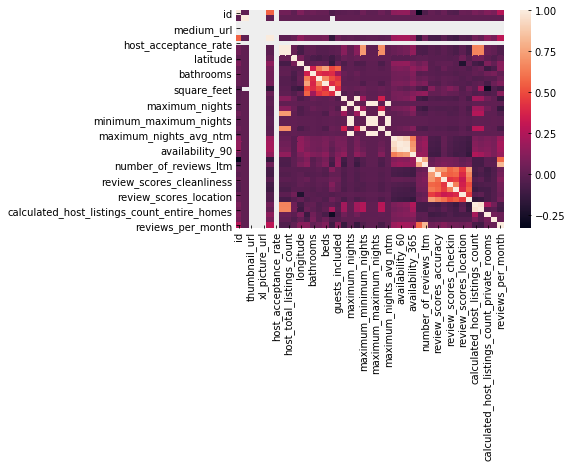

In [577]:
ax = sns.heatmap(corr)

/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


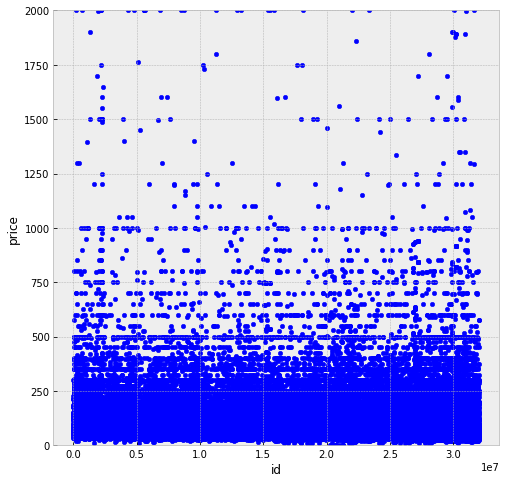

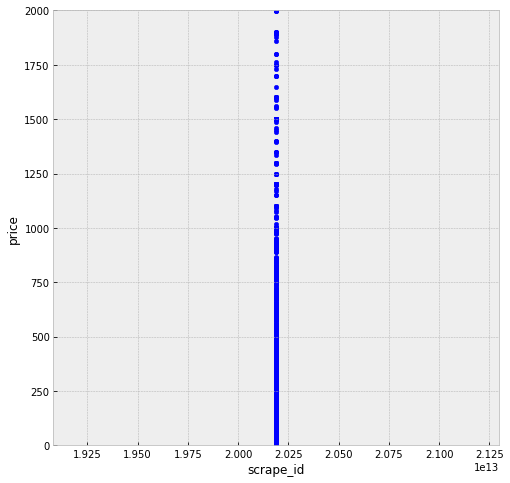

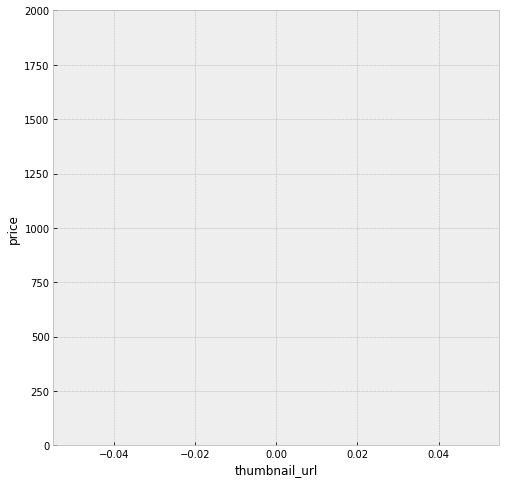

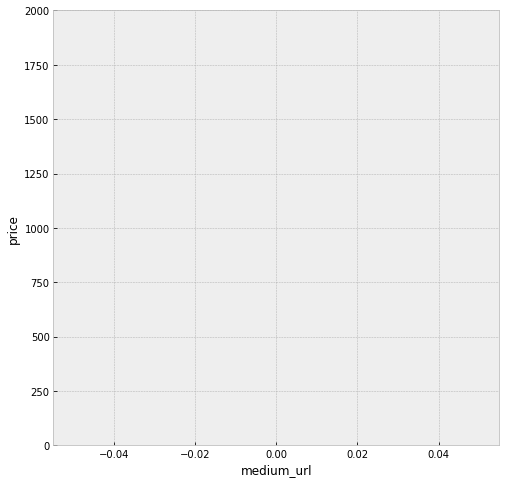

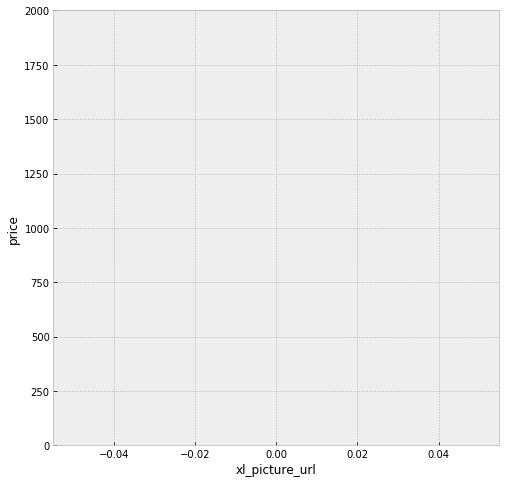

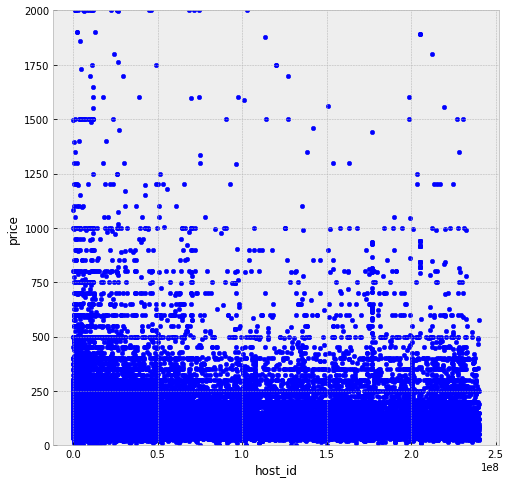

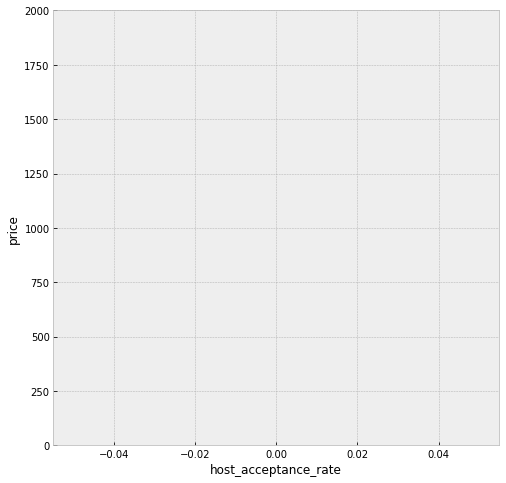

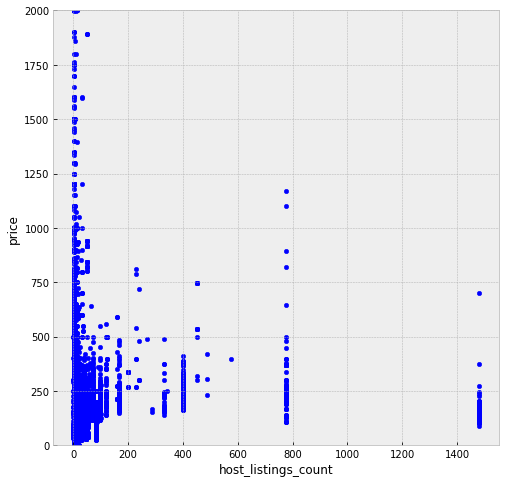

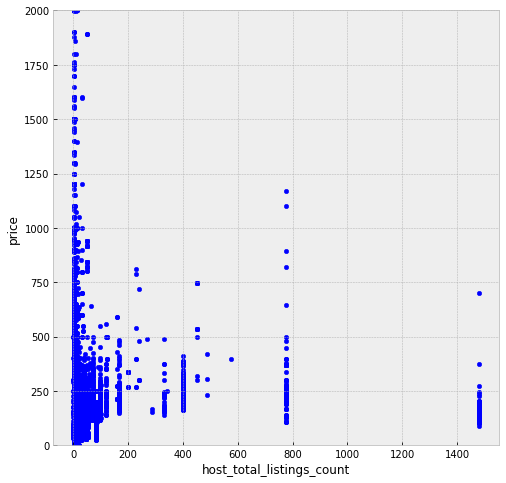

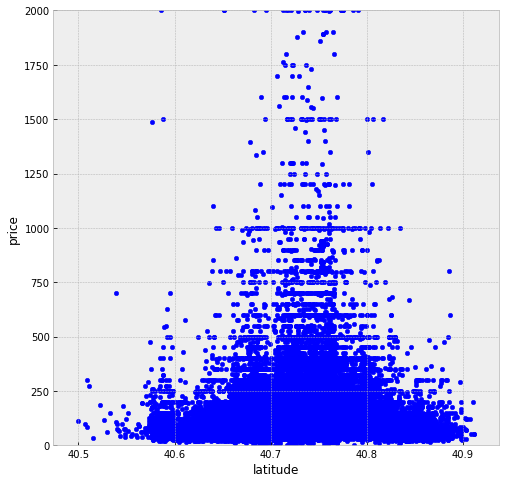

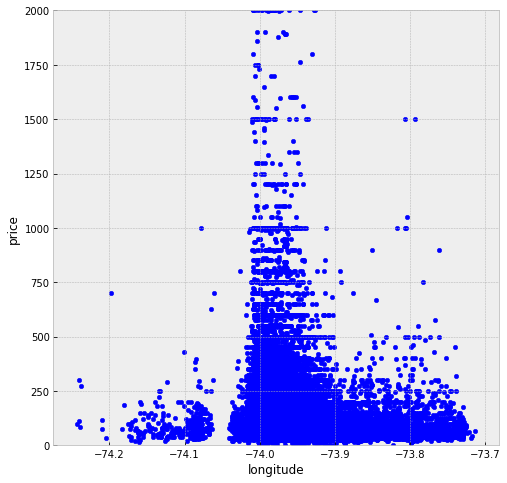

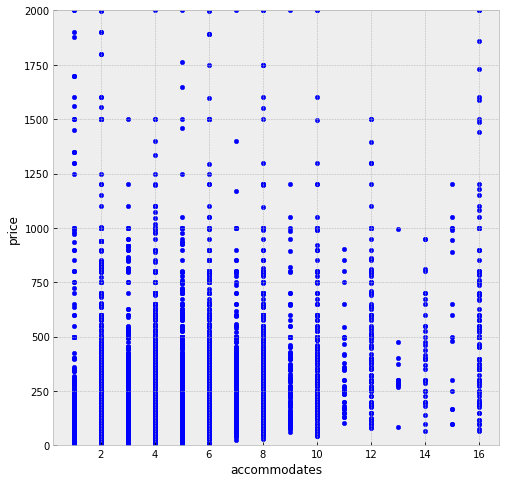

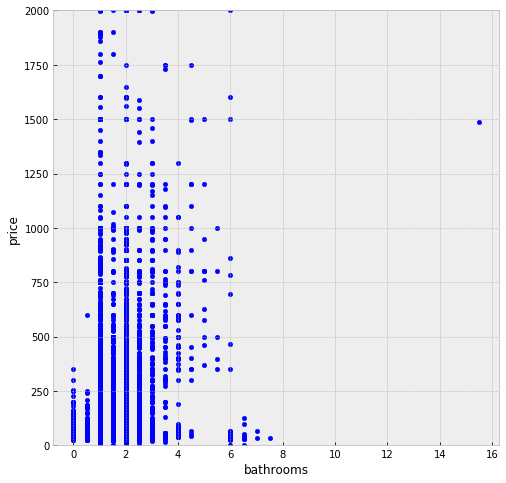

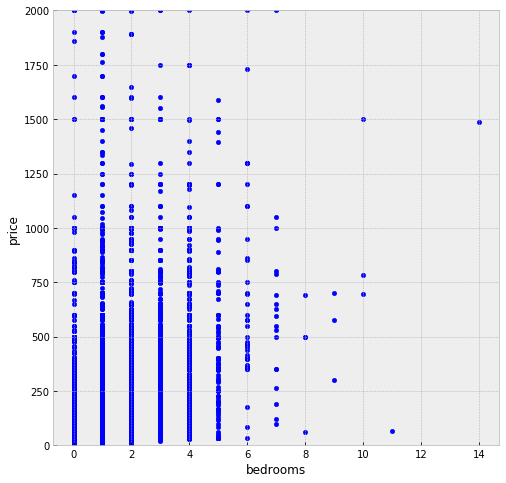

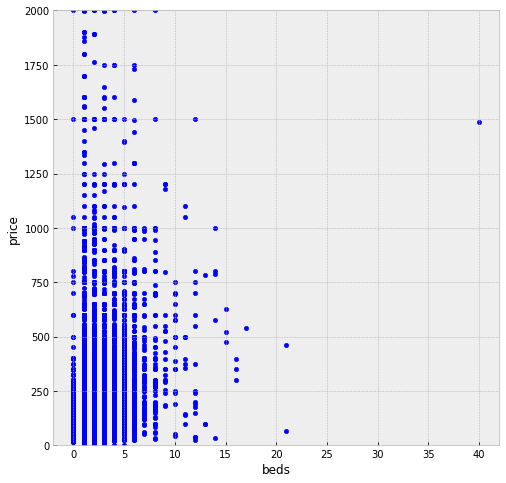

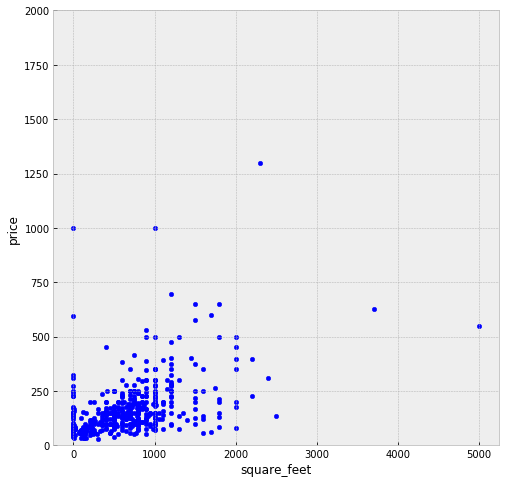

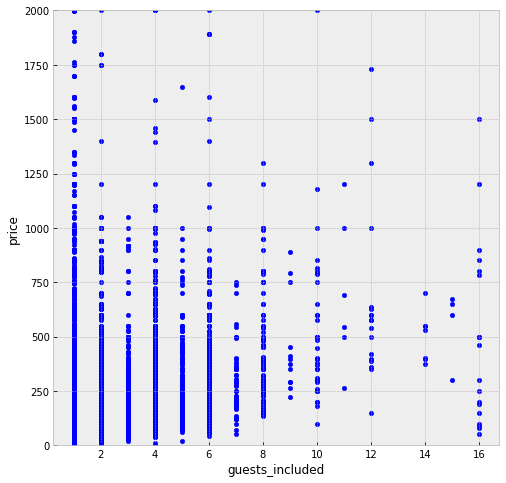

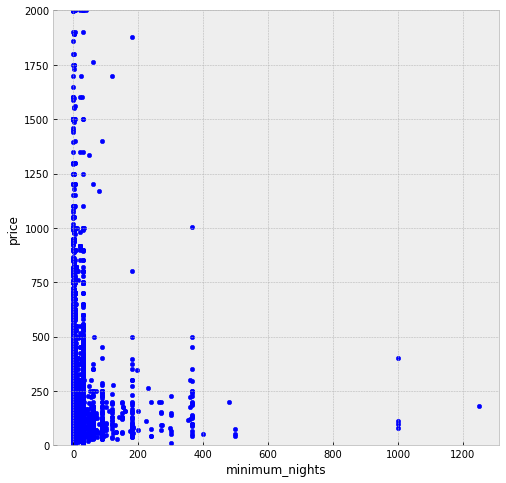

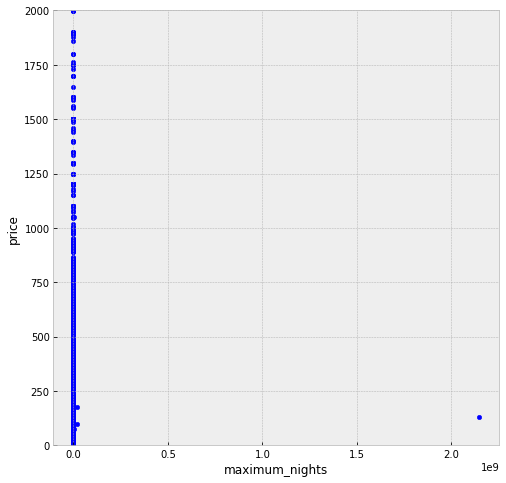

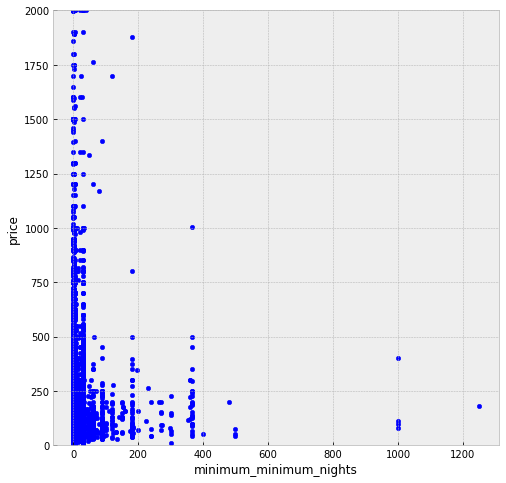

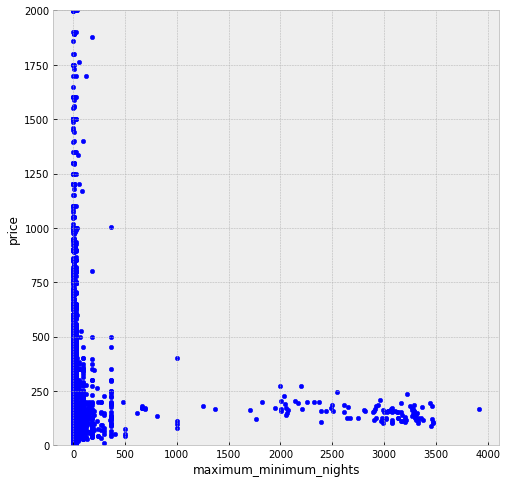

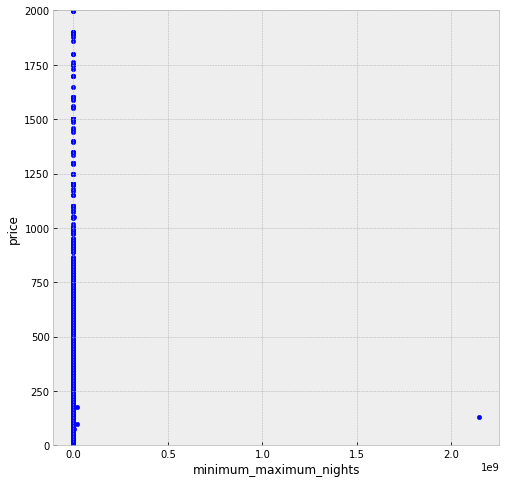

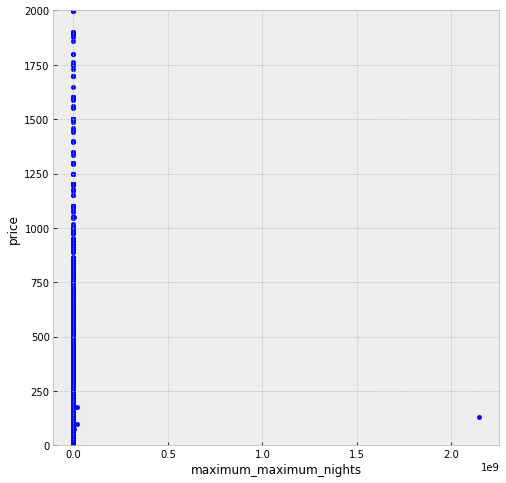

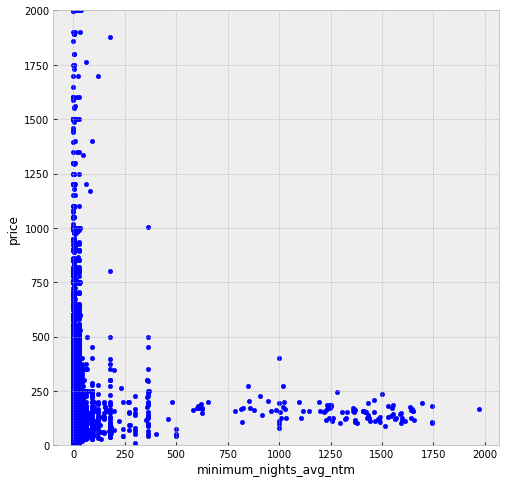

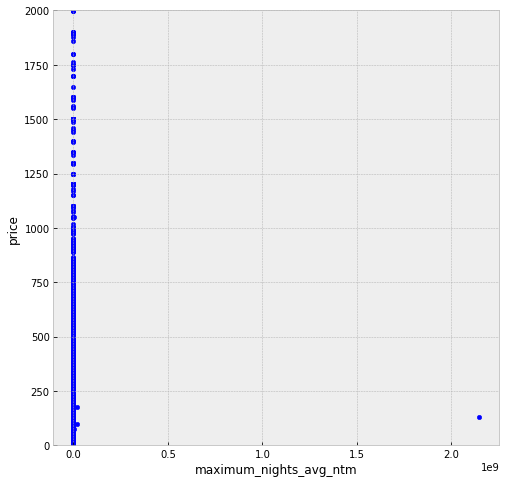

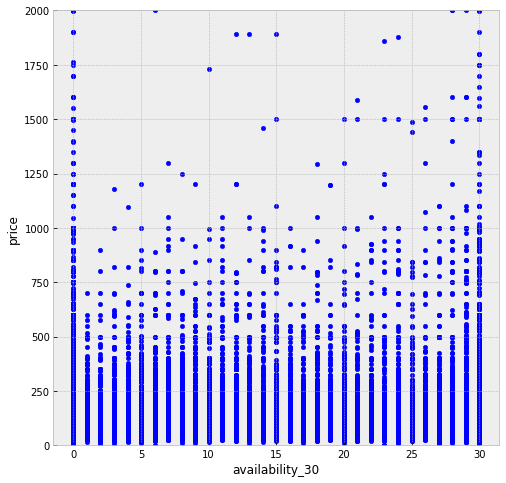

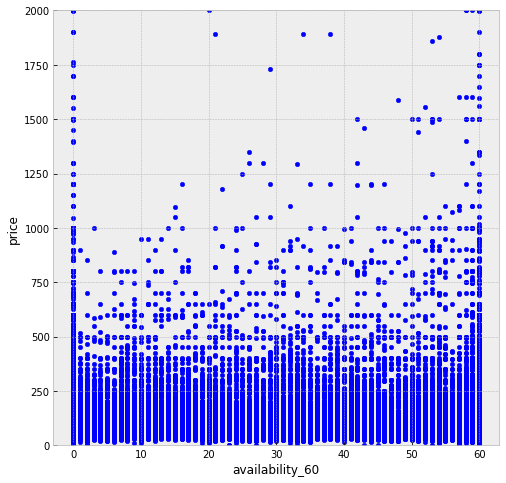

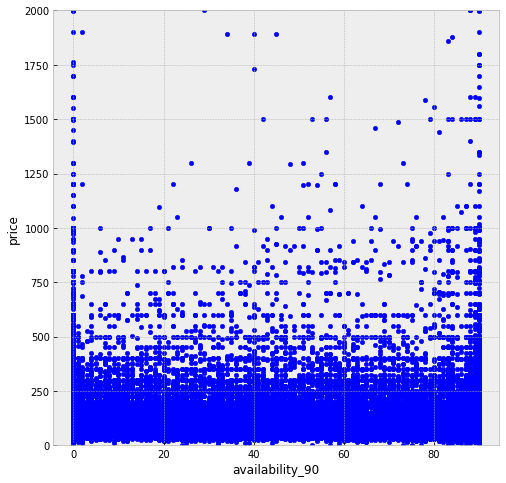

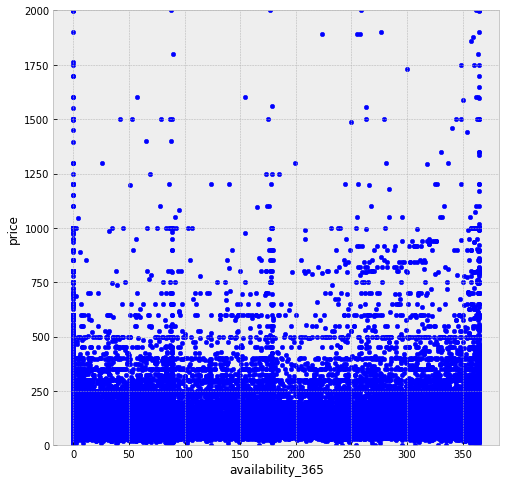

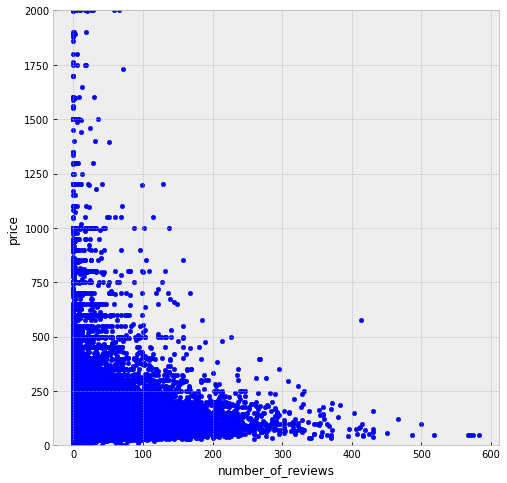

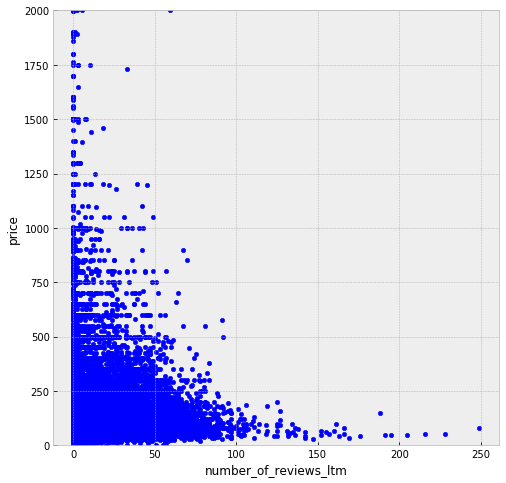

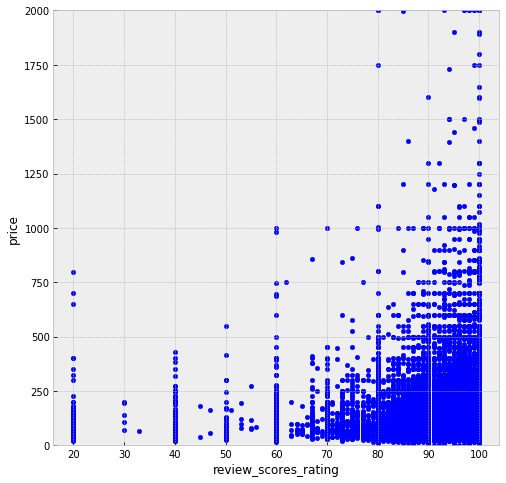

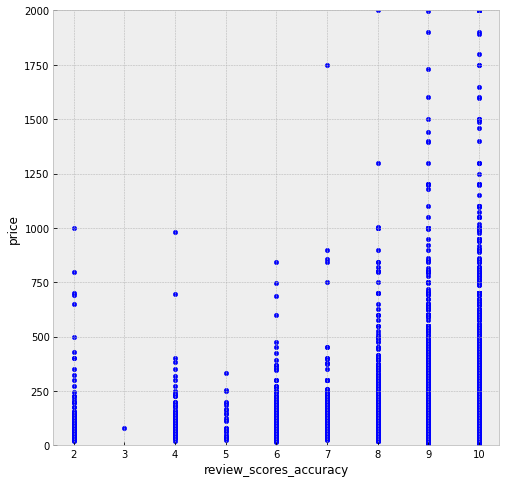

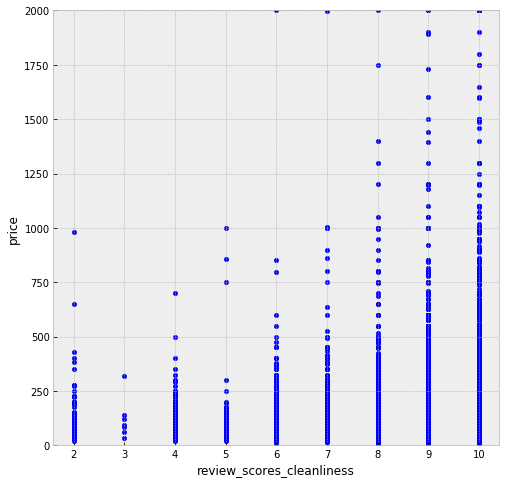

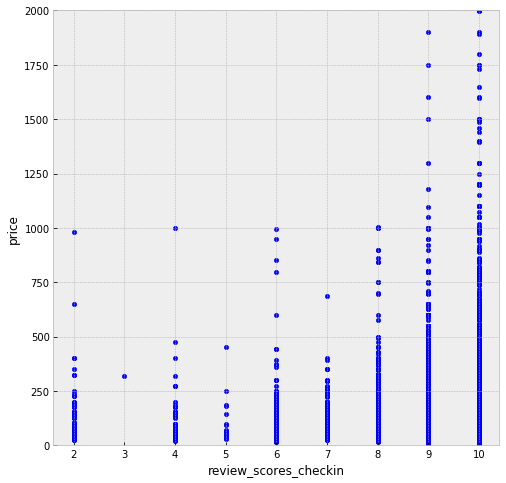

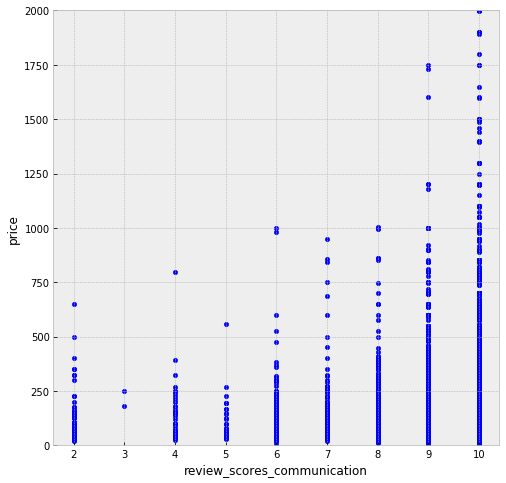

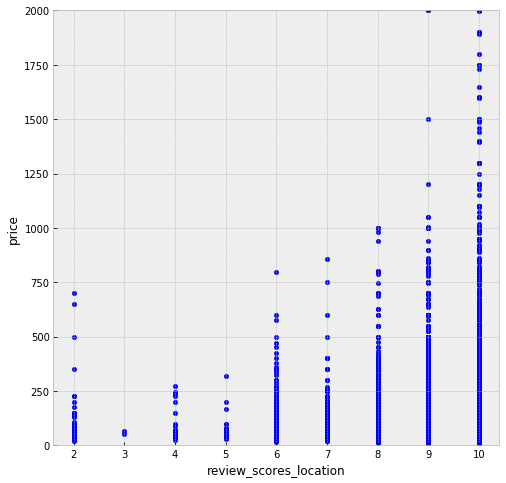

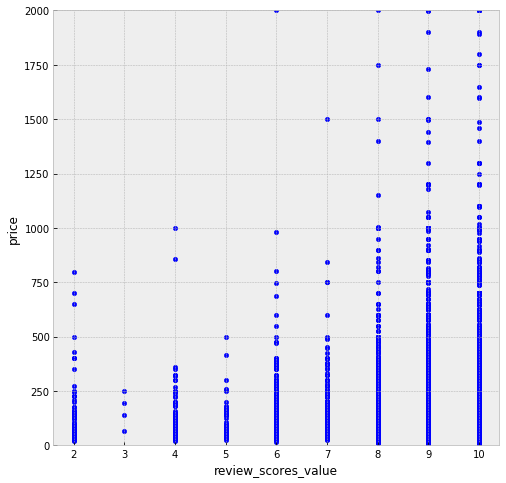

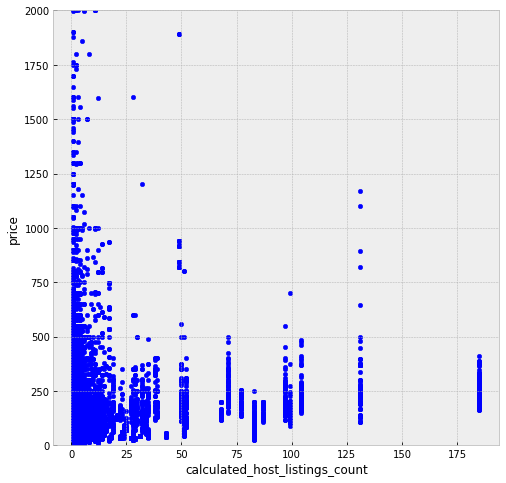

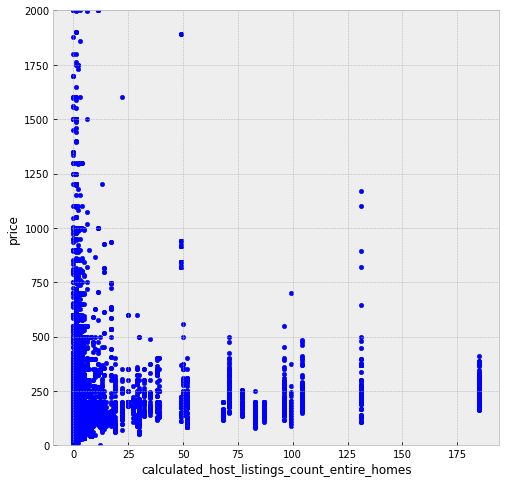

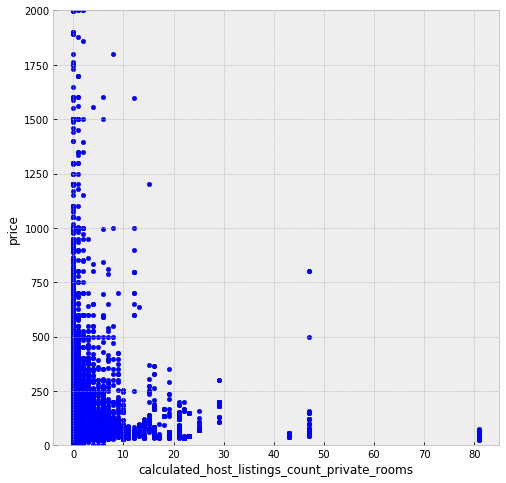

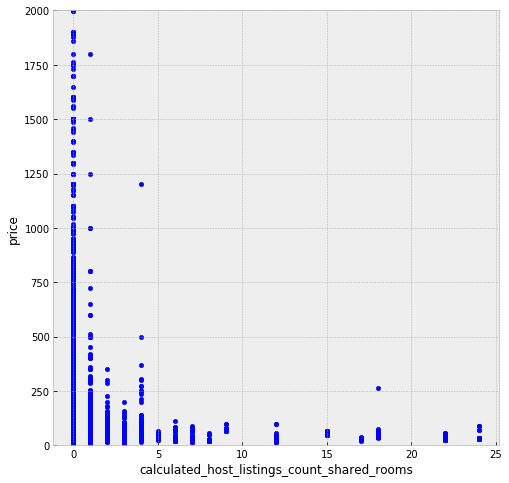

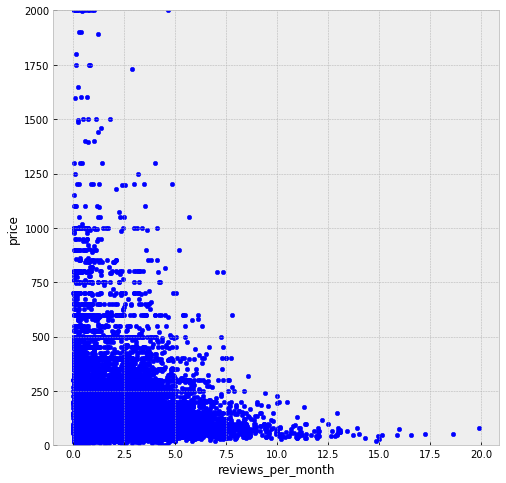

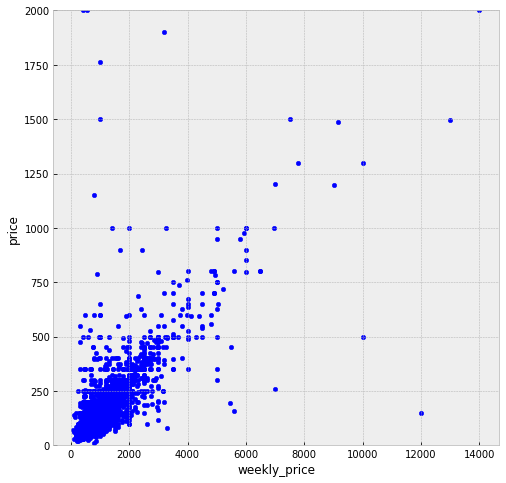

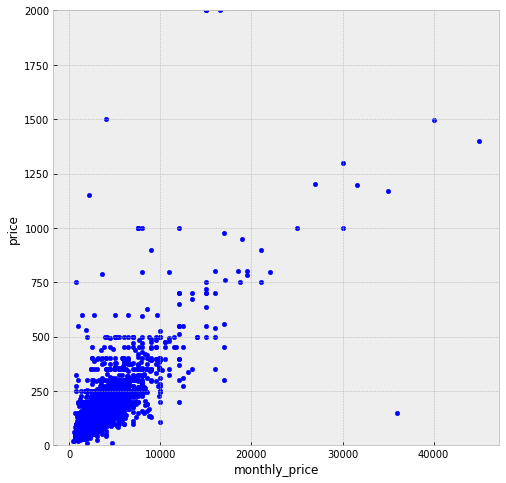

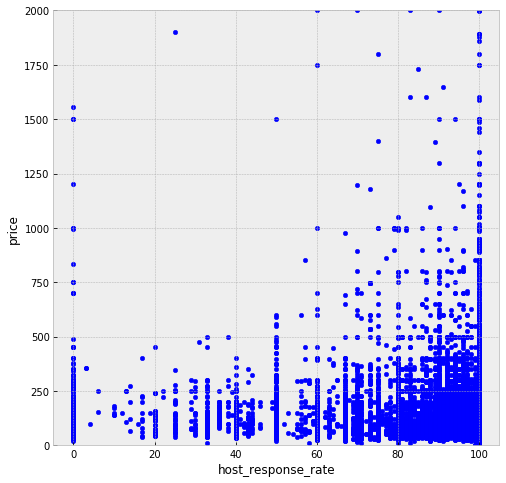

In [594]:
for column_title in listings_num3.columns[:-1]:
    
    listings_num3.plot.scatter(x=column_title, ylim=[0,2000],y='price', figsize = (8,8))

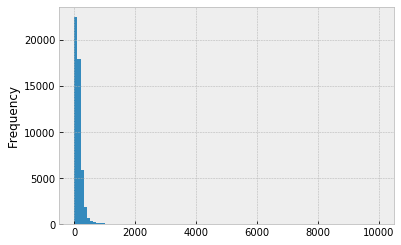

In [590]:
listings_num3.price.plot.hist(bins = 100)

In [ ]:
listings_num3

In [2]:
pd.plotting.scatter_matrix(listings_num3,figsize  = [9, 9])

NameError: name 'pd' is not defined

In [1]:
2

2

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy as np

In [43]:
f = 'price~square_feet'
model = smf.ols(formula = f, data = listings_2_19).fit()

In [44]:
resid = model.resid

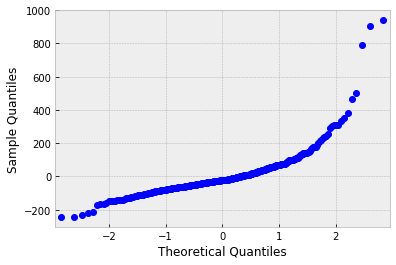

In [45]:
fig = sm.graphics.qqplot(resid, dist = stats.norm)


In [207]:
f6 = 'price~square_feet'
model6 = smf.ols(formula = f6, data = listings).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           3.37e-25
Time:                        22:08:59   Log-Likelihood:                -2759.8
No. Observations:                 445   AIC:                             5524.
Df Residuals:                     443   BIC:                             5532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      94.7628      9.231     10.265      0.000      76.620     112.906
square_feet     0.1142      0.010     11.040      0.000       0.094       0.134
==============================================================================
Omnibus:                      365.242   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8519.646
Skew:                           3.390   Prob(JB):                         0.00
Kurtosis:                      23.335   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
len(listings.square_feet) - listings.square_feet.isna().sum() 
listings.square_feet.isna().sum() / len(listings.square_feet) 



0.9911403997770168

In [60]:
f1 = 'price~accommodates'
model = smf.ols(formula = f1, data = listings_2_19).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     7396.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:58:27   Log-Likelihood:            -3.4006e+05
No. Observations:               50228   AIC:                         6.801e+05
Df Residuals:                   50226   BIC:                         6.801e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.4092      1.713     16.002      0.000      24.052      30.766
accommodates    42.6020      0.495     85.997      0.000      41.631      43.573
==============================================================================
Omnibus:                   117296.603   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1586870314.942
Skew:                          23.139   Prob(JB):                         0.00
Kurtosis:                     872.539   Cond. No.                         6.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
resid1 = model.resid

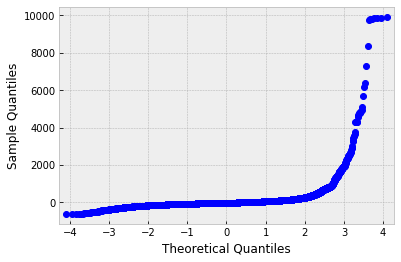

In [48]:
fig = sm.graphics.qqplot(resid1)

In [94]:
f2 = 'price~room_type_Entire_homeapt+room_type_Private_room+room_type_Shared_room'
model = smf.ols(formula = f2, data = dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1298.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:00:31   Log-Likelihood:            -3.4164e+05
No. Observations:               50228   AIC:                         6.833e+05
Df Residuals:                   50224   BIC:                         6.833e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.643e+13   1.83e+14     -0.309      0.757   -4.15e+14    3.02e+14
room_type_Entire_homeapt  5.643e+13   1.83e+14      0.309      0.757   -3.02e+14    4.15e+14
room_type_Private_room    5.643e+13   1.83e+14      0.309      0.757   -3.02e+14    4.15e+14
room_type_Shared_room     5.643e+13   1.83e+14      0.309      0.757   -3.02e+14    4.15e+14
==============================================================================
Omnibus:                   115357.921   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1322979287.152
Skew:                          22.264   Prob(JB):                         0.00
Kurtosis:                     796.829   Cond. No.                     4.59e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [110]:
for column_name in neighborhood_dummies.columns:
    neighborhood_dummies.rename(columns = {column_name: column_name.replace(' ', '_').replace('/','')}, inplace = True)
    
neighborhood_dummies.columns

Index(['neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten_Island'],
      dtype='object')

In [106]:
for column_name in dummies.columns:
    dummies.rename(columns = {column_name: column_name.replace(' ', '_').replace('/','')}, inplace = True)
    
dummies.columns

Index(['room_type_Entire_homeapt', 'room_type_Private_room',
       'room_type_Shared_room', 'zipcode_07093', 'zipcode_10001',
       'zipcode_10002', 'zipcode_10003', 'zipcode_10004', 'zipcode_10005',
       'zipcode_10006',
       ...
       'zipcode_34746', 'zipcode_91766', 'zipcode_96740', 'zipcode_nan',
       'price', 'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten_Island'],
      dtype='object', length=205)

In [86]:
dummies

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,zipcode_07093,zipcode_10001,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,...,zipcode_11692,zipcode_11693,zipcode_11694,zipcode_11801,zipcode_11954,zipcode_34746,zipcode_91766,zipcode_96740,zipcode_nan,price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,137.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,149.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,225.0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,70.0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150.0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89.0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80.0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,185.0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.0


In [112]:
zip_string = "+".join(list(zip_code_dummies.columns))

In [100]:
f2 = f'price~{zip_string}'
model = smf.ols(formula = f2, data = dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     19.14
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:08   Log-Likelihood:            -3.4171e+05
No. Observations:               50228   AIC:                         6.838e+05
Df Residuals:                   50032   BIC:                         6.855e+05
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        141.7165      4.964     28.547      0.000     131.986     151.447
zipcode_07093    134.2835    217.295      0.618      0.537    -291.616     560.183
zipcode_10001    109.1113     10.585     10.308      0.000      88.365     129.858
zipcode_10002     36.6595      7.825      4.685      0.000      21.323      51.996
zipcode_10003     86.0967      8.163     10.547      0.000      70.098     102.096
zipcode_10004     75.3880     27.000      2.792      0.005      22.467     128.309
zipcode_10005     70.6183     15.433      4.576      0.000      40.369     100.868
zipcode_10006     55.3082     24.643      2.244      0.025       7.008     103.608
zipcode_10007    246.8767     28.714      8.598      0.000     190.596     303.157
zipcode_10009     30.3470      7.974      3.806      0.000      14.718      45.976
zipcode_10010     87.1000     12.107      7.194      0.000      63.369     110.831
zipcode_10011     98.7658      8.680     11.379      0.000      81.754     115.778
zipcode_10012     91.7841      9.292      9.878      0.000      73.572     109.996
zipcode_10013    142.1904     10.867     13.084      0.000     120.891     163.490
zipcode_10014    113.7588      9.190     12.378      0.000      95.746     131.771
zipcode_10016     74.2816      8.250      9.004      0.000      58.112      90.451
zipcode_10017    204.8447     12.043     17.009      0.000     181.240     228.449
zipcode_10018     88.1837     11.930      7.392      0.000      64.800     111.567
zipcode_10019     89.3070      7.699     11.600      0.000      74.218     104.396
zipcode_10021     25.1153     12.898      1.947      0.052      -0.165      50.396
zipcode_10022    104.2254     10.631      9.804      0.000      83.388     125.063
zipcode_10023     88.4035     10.702      8.260      0.000      67.427     109.380
zipcode_10024     47.9209     10.623      4.511      0.000      27.099      68.743
zipcode_10025     27.1299      8.250      3.289      0.001      10.960      43.300
zipcode_10026    -14.7330     10.532     -1.399      0.162     -35.376       5.910
zipcode_10027      1.7289      8.847      0.195      0.845     -15.612      19.070
zipcode_10028     36.7649     11.310      3.251      0.001      14.598      58.932
zipcode_10029     -9.0897      9.380     -0.969      0.333     -27.475       9.296
zipcode_10030    -31.7981     12.200     -2.606      0.009     -55.710      -7.886
zipcode_10031    -37.7300      8.816     -4.280      0.000     -55.010     -20.450
zipcode_10032    -56.1977     11.107     -5.059      0.000     -77.968     -34.427
zipcode_10033    -54.3059     13.450     -4.038      0.000     -80.669     -27.943
zipcode_10034    -56.0279     17.528     -3.196      0.001     -90.383     -21.673
zipcode_10035    -27.2727     12.538     -2.175      0.030     -51.848      -2.698
zipcode_1003

In [116]:
neighborhood_string = "+".join(list(neighborhood_dummies.columns))
neighborhood_string

'neighbourhood_group_cleansed_Bronx+neighbourhood_group_cleansed_Brooklyn+neighbourhood_group_cleansed_Manhattan+neighbourhood_group_cleansed_Queens+neighbourhood_group_cleansed_Staten_Island'

In [117]:
f3 = f'price~{neighborhood_string}'
model3 = smf.ols(formula = f3, data = dummies).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     397.7
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:12:57   Log-Likelihood:            -3.4273e+05
No. Observations:               50228   AIC:                         6.855e+05
Df Residuals:                   50223   BIC:                         6.855e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                  -7.635e+13   2.92e+14     -0.261      0.794   -6.49e+14    4.96e+14
neighbourhood_group_cleansed_Bronx          7.635e+13   2.92e+14      0.261      0.794   -4.96e+14    6.49e+14
neighbourhood_group_cleansed_Brooklyn       7.635e+13   2.92e+14      0.261      0.794   -4.96e+14    6.49e+14
neighbourhood_group_cleansed_Manhattan      7.635e+13   2.92e+14      0.261      0.794   -4.96e+14    6.49e+14
neighbourhood_group_cleansed_Queens         7.635e+13   2.92e+14      0.261      0.794   -4.96e+14    6.49e+14
neighbourhood_group_cleansed_Staten_Island  7.635e+13   2.92e+14      0.261      0.794   -4.96e+14    6.49e+14
==============================================================================
Omnibus:                   112602.649   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1122799311.775
Skew:                          21.014   Prob(JB):                         0.00
Kurtosis:                     734.253   Cond. No.                     8.52e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.66e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [115]:
dummies

,room_type_Entire_homeapt,room_type_Private_room,room_type_Shared_room,zipcode_07093,zipcode_10001,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,...,zipcode_34746,zipcode_91766,zipcode_96740,zipcode_nan,price,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten_Island
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,137.0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,149.0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,225.0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,70.0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,150.0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,89.0,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,80.0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,185.0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,60.0,0,1,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,79.0,0,0,1,0,0


In [120]:
f4 = f'price~bedrooms'
model4 = smf.ols(formula = f4, data = listings_2_19).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3750.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:16:11   Log-Likelihood:            -3.4143e+05
No. Observations:               50185   AIC:                         6.829e+05
Df Residuals:                   50183   BIC:                         6.829e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.7882      1.799     32.119      0.000      54.262      61.315
bedrooms      78.3328      1.279     61.236      0.000      75.826      80.840
==============================================================================
Omnibus:                   113904.333   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1261388894.251
Skew:                          21.622   Prob(JB):                         0.00
Kurtosis:                     778.477   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
dummies_copy = dummies.copy()
dummies_copy = dummies_copy.drop("price", axis = 1)
listings = pd.concat([listings_2_19, dummies_copy ], axis = 1)


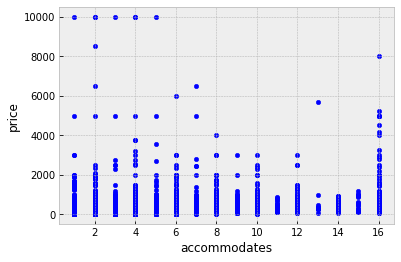

In [142]:
listings.plot.scatter(x="accommodates",y="price")

# listings.accommodates.shape
# listings.price.shape

In [164]:
listings2 = listings.loc[(listings["accommodates"] >= 14) & (listings['price'] < 500) , ["accommodates","price"]]

In [162]:
np.nan < 500

False

In [171]:
listings2.sort_values("price")

,accommodates,price
26333,14,65.0
34427,16,65.0
32744,16,75.0
45097,16,98.0
8688,16,99.0
39148,14,99.0
13362,16,99.0
44872,15,99.0
42298,15,100.0
41603,16,100.0


df.loc[df["alcohol"]<12, ["color_intensity"]]

(0, 300)

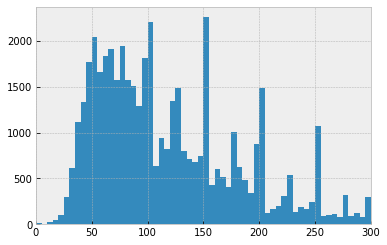

In [191]:
plt.hist(listings.price, bins = 2000)
plt.xlim((0,300))


#listings.price.hist(bins = 100, xlim = [0,1000])

In [200]:
listings_2_19
# ["TV"] = listings_2_19["amenities"].str.contains("TV")
# listings_2_19["Internet"] = listings_2_19["amenities"].str.contains("Internet|Wifi")
# listings_2_19["AC"] = listings_2_19["amenities"].str.contains("Air conditioning")
# listings_2_19["Kitchen"] = listings_2_19["amenities"].str.contains("Kitchen")
# listings_2_19["Heating"] = listings_2_19["amenities"].str.contains("Heating")

amenities_string = "AC+Internet+Kitchen+Heating"
room_string ="room_type_Entire_homeapt+room_type_Private_room+room_type_Shared_room"

In [206]:
f5 = f'price~{amenities_string}+{room_string}+{neighborhood_string}+{zip_string}'
model5 = smf.ols(formula = f5, data = listings).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     30.97
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:07:24   Log-Likelihood:            -3.4051e+05
No. Observations:               50228   AIC:                         6.814e+05
Df Residuals:                   50022   BIC:                         6.833e+05
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     85.7514     11.999      7.146      0.000      62.233     109.270
AC[T.True]                                    11.6025      2.785      4.166      0.000       6.144      17.061
Internet[T.True]                              -8.2616      6.870     -1.203      0.229     -21.726       5.203
Kitchen[T.True]                              -13.4417      3.731     -3.603      0.000     -20.754      -6.129
Heating[T.True]                               -7.3789      4.011     -1.840      0.066     -15.240       0.483
room_type_Entire_homeapt                      99.7887      4.522     22.065      0.000      90.925     108.653
room_type_Private_room                         2.5880      4.459      0.580      0.562      -6.151      11.327
room_type_Shared_room                        -16.6253      6.146     -2.705      0.007     -28.672      -4.578
neighbourhood_group_cleansed_Bronx            63.1397     41.087      1.537      0.124     -17.390     143.670
neighbourhood_group_cleansed_Brooklyn          0.4159     26.369      0.016      0.987     -51.268      52.100
neighbourhood_group_cleansed_Manhattan        83.8244     25.798      3.249      0.001      33.259     134.389
neighbourhood_group_cleansed_Queens           -7.7675     29.372     -0.264      0.791     -65.336      49.801
neighbourhood_group_cleansed_Staten_Island   -53.8610    101.110     -0.533      0.594    -252.038     144.316
zipcode_07093                                 24.1152    212.741      0.113      0.910    -392.859     441.089
zipcode_10001                                 22.8665     18.227      1.255      0.210     -12.858      58.591
zipcode_10002                                -31.4740     16.843     -1.869      0.062     -64.487       1.539
zipcode_10003                                  4.8009     16.995      0.282      0.778     -28.509      38.111
zipcode_10004                                 -3.8293     30.342     -0.126      0.900     -63.300      55.642
zipcode_10005                                -15.6543     21.273     -0.736      0.462     -57.350      26.041
zipcode_10006                                -28.4603     28.364     -1.003      0.316     -84.053      27.133
zipcode_10007                                146.9440     31.814      4.619      0.000      84.588     209.300
zipcode_10009                                -39.7860     16.886     -2.356      0.018     -72.883      -6.689
zipcode_10010                                 -1.2582     19.110     -0.066      0.948     -38.715      36.198
zipcode_10011                                  8.5625     17.241      0.497      0.619     -25.231      42.356
zipcode_10012                                  8.8998     17.539      0.507      0.612

In [202]:
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,zipcode_11954,zipcode_34746,zipcode_91766,zipcode_96740,zipcode_nan,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten_Island
0,2454,https://www.airbnb.com/rooms/2454,20190201155637,2019-02-01,superCondo,"Great light, exposed brick and 10 feet high ce...","A fully renovated, West Elm furnished Condo, w...","Great light, exposed brick and 10 feet high ce...",none,Turtle bay neighborhood in the heart of midtow...,...,0,0,0,0,0,0,0,1,0,0
1,2539,https://www.airbnb.com/rooms/2539,20190201155637,2019-02-02,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,0,0,0,0,0,0,1,0,0,0
2,2595,https://www.airbnb.com/rooms/2595,20190201155637,2019-02-02,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,0,0,0,0,0,0,0,1,0,0
3,3330,https://www.airbnb.com/rooms/3330,20190201155637,2019-02-02,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,0,0,0,0,0,0,1,0,0,0
4,3647,https://www.airbnb.com/rooms/3647,20190201155637,2019-02-02,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,0,0,0,0,0,0,0,1,0,0
5,3831,https://www.airbnb.com/rooms/3831,20190201155637,2019-02-02,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,0,0,0,0,0,0,1,0,0,0
6,5022,https://www.airbnb.com/rooms/5022,20190201155637,2019-02-02,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,0,0,0,0,0,0,0,1,0,0
7,5099,https://www.airbnb.com/rooms/5099,20190201155637,2019-02-01,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,0,0,0,0,0,0,0,1,0,0
8,5121,https://www.airbnb.com/rooms/5121,20190201155637,2019-02-02,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,0,0,0,0,0,0,1,0,0,0
9,5178,https://www.airbnb.com/rooms/5178,20190201155637,2019-02-01,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,0,0,0,0,0,0,0,1,0,0
